In [1]:
import numpy
import keras
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import os

Using TensorFlow backend.


In [2]:
root_path = r"c:\Data\181101_Spine"

train_path = os.path.join(root_path, "train")
valid_path = os.path.join(root_path, "valid")
test_path = os.path.join(root_path, "test")

In [3]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(512, 512), classes=["pos", "neg"], batch_size=20)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(512, 512), classes=["pos", "neg"], batch_size=7)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(512, 512), classes=["pos", "neg"], batch_size=100)

Found 2037 images belonging to 2 classes.
Found 715 images belonging to 2 classes.
Found 747 images belonging to 2 classes.


In [4]:
def plots(ims, figsize=(20,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is numpy.ndarray:
        ims = numpy.array(ims).astype(numpy.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0, 2, 3, 1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis("Off")
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [ ]:
imgs, labels = next(train_batches)

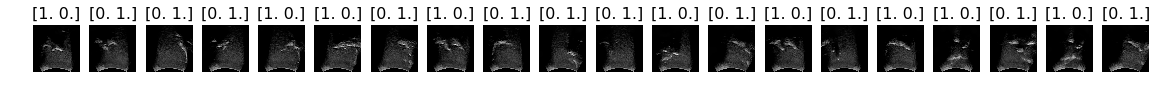

In [ ]:
plots(imgs, titles=labels)

In [ ]:
model = keras.Sequential([
    Conv2D(16, (3,3), strides=2, activation='relu', input_shape=(512,512,3)),
    Conv2D(16, (3,3), strides=2, activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(200, activation='relu'),
    Dropout(.5),
    Dense(200, activation='relu'),
    Dropout(.5),
    Dense(2, activation='softmax')
])

In [ ]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 255, 255, 16)      448       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 127, 127, 16)      2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 61, 61, 32)        4640      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 59, 59, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 29, 29, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 27, 27, 64)        18496     
__________

In [ ]:
model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit_generator(train_batches, steps_per_epoch=100, validation_data=valid_batches, validation_steps=100, epochs=10, verbose=1)

Epoch 1/10
100/100 [==============================] - 16s 164ms/step - loss: 1.0234 - acc: 0.6630 - val_loss: 0.4810 - val_acc: 0.7657
Epoch 2/10
100/100 [==============================] - 14s 140ms/step - loss: 0.3998 - acc: 0.8201 - val_loss: 0.3779 - val_acc: 0.8228
Epoch 3/10
100/100 [==============================] - 14s 140ms/step - loss: 0.2887 - acc: 0.8806 - val_loss: 0.3403 - val_acc: 0.8573
Epoch 4/10
100/100 [==============================] - 14s 139ms/step - loss: 0.2074 - acc: 0.9215 - val_loss: 0.3955 - val_acc: 0.8573
Epoch 5/10
100/100 [==============================] - 14s 139ms/step - loss: 0.1644 - acc: 0.9379 - val_loss: 0.5762 - val_acc: 0.7795
Epoch 6/10
100/100 [==============================] - 14s 139ms/step - loss: 0.1307 - acc: 0.9493 - val_loss: 0.5756 - val_acc: 0.8228
Epoch 7/10
100/100 [==============================] - 14s 140ms/step - loss: 0.1233 - acc: 0.9515 - val_loss: 0.6591 - val_acc: 0.8170
Epoch 8/10
 99/100 [============================>.] - E

In [ ]:
test_imgs, test_labels = next(test_batches)
# plots(test_imgs, titles=test_labels)

In [ ]:
test_labels = test_labels[:,0]
predictions = model.predict_generator(test_batches, steps=1, verbose=0)

In [ ]:
for i in range(predictions.shape[0]):
    if predictions[i][0] > predictions[i][1]:
        predictions[i][0]=1
    else:
        predictions[i][0]=0

In [ ]:
import pandas as pd
y_true = pd.Series(test_labels)
y_pred = pd.Series(predictions[:,0])
pd.crosstab(y_true, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)